# Movie Genre Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pickle
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shromana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading Training and Testing Dataset

## Dataset Description

Genre Classification Dataset IMDb.

Train data:
    
ID ::: TITLE ::: GENRE ::: DESCRIPTION


Test data:
    
ID ::: TITLE ::: DESCRIPTION


In [3]:
file_path = 'train_data.txt'

In [4]:
train_data = pd.read_csv(file_path,delimiter=':::',header=None,index_col=None)

C:\Users\shromana\AppData\Local\Temp\ipykernel_10576\3365846805.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv(file_path,delimiter=':::',header=None,index_col=None)


In [5]:
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
# Renaming the columns 
train_data.rename(columns={0:'ID',1:'Title',2:'Genre',3:'Description'},inplace=True)

In [7]:
train_data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
file_path = 'test_data_solution.txt'
test_data =pd.read_csv(file_path,delimiter=':::',header=None,index_col=None)

C:\Users\shromana\AppData\Local\Temp\ipykernel_10576\252109394.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data =pd.read_csv(file_path,delimiter=':::',header=None,index_col=None)


In [9]:
test_data.head()

,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [10]:
# Renaming the columns 
test_data.rename(columns={0:'ID',1:'Title',2:'Genre',3:'Description'},inplace=True)

## Exploratory Data Analysis

### Concatenating train_data and test_data

In [11]:
df = pd.concat([train_data,test_data],axis=0)
df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [12]:
#describing the dataset
df.describe() 

,ID
count,108414.000000
mean,27104.000452
std,15648.285970
min,1.000000
25%,13552.250000
50%,27104.000000
75%,40655.750000
max,54214.000000


In [13]:
df.reset_index(inplace= True)
df.head()

,index,ID,Title,Genre,Description
0,0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [14]:
# number of rows and columns in the dataset
df.shape

(108414, 5)

In [15]:
# getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108414 entries, 0 to 108413
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   index        108414 non-null  int64 
 1   ID           108414 non-null  int64 
 2   Title        108414 non-null  object
 3   Genre        108414 non-null  object
 4   Description  108414 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.1+ MB


In [16]:
#Datatypes of each column
df.dtypes

index           int64
ID              int64
Title          object
Genre          object
Description    object
dtype: object

In [17]:
# Dropping columns
df = df. drop(['ID'], axis=1)

In [18]:
#unique values present in target column
df["Genre"].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

### Check proportion of each class

In [19]:
df['Genre'].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

In [20]:
#Check for missing values
df.isnull()
df.isnull().sum()

index          0
Title          0
Genre          0
Description    0
dtype: int64

In [21]:
#Check for duplicate values
df.duplicated().sum()

0

In [22]:
#unique values present
df.apply(pd.Series.nunique)

index           54214
Title          108414
Genre              27
Description    108067
dtype: int64

In [23]:
df = df.reset_index(drop=True)

## Data Visualisation

<Axes: xlabel='Genre', ylabel='count'>

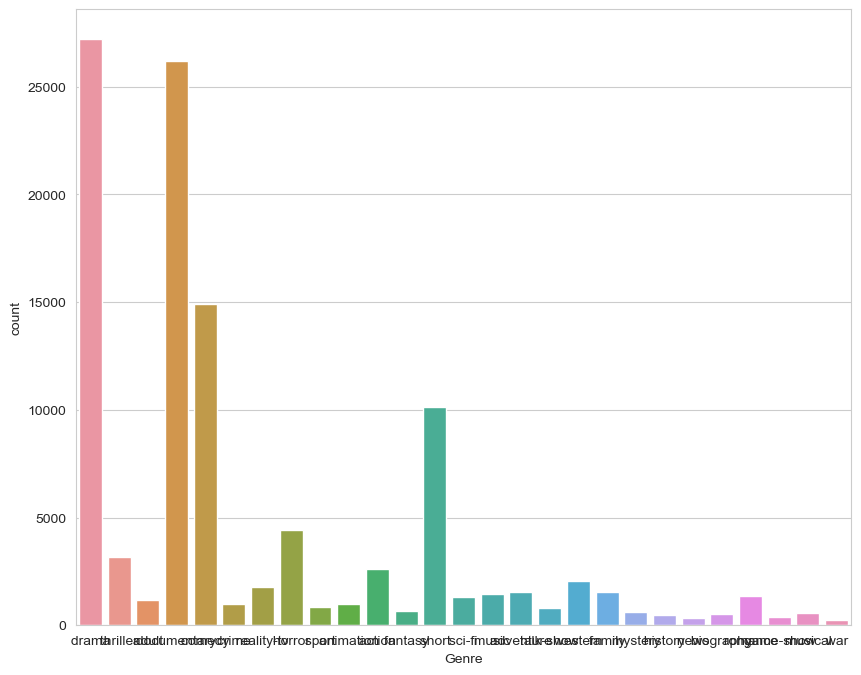

In [24]:

plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='Genre',data=df)

In [25]:
# Label Encoding
genre_to_label = {genre: label for label, genre in enumerate(df['Genre'].unique())}
df['Genre_Label'] = df['Genre'].map(genre_to_label)



In [26]:
df.head()

,index,Title,Genre,Description,Genre_Label
0,0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,0
1,1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,1
2,2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,2
3,3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,0
4,4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,0


In [27]:
df['num_characters'] = df['Description'].apply(len)

In [28]:
df.head()

,index,Title,Genre,Description,Genre_Label,num_characters
0,0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,0,546
1,1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,1,184
2,2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,2,650
3,3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,0,1082
4,4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,0,625


## Separating Features and Target

In [29]:
X = df["Description"]

In [30]:
X.head()

0     Listening in to a conversation between his do...
1     A brother and sister with a past incestuous r...
2     As the bus empties the students for their fie...
3     To help their unemployed father make ends mee...
4     The film's title refers not only to the un-re...
Name: Description, dtype: object

In [31]:
X.shape

(108414,)

In [32]:
#Target
y = df["Genre_Label"]

In [38]:
y

0          0
1          1
2          2
3          0
4          0
          ..
108409     7
108410    17
108411     2
108412     0
108413     0
Name: Genre_Label, Length: 108414, dtype: int64

In [34]:
# Splitting training and testing data

X_train, X_test, y_train, y_test = train_test_split(df['Description'],df['Genre_Label'] , test_size = 0.2, random_state = 2)

### Feature Extraction

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tf=tfidf_vectorizer.fit_transform(X_train)

In [36]:

X_test_tf=tfidf_vectorizer.transform(X_test)

In [39]:
 from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_tf, y_train)

MultinomialNB()

### Accuracy

In [41]:
pred_train = model.predict(X_train_tf)
pred_test  = model.predict(X_test_tf)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.5502876710749328
Testing Set Accuracy  :  0.5208688834570862


In [42]:
report2=classification_report(y_test,pred_test)
print(report2)

              precision    recall  f1-score   support

           0       0.45      0.83      0.58      5321
           1       0.53      0.01      0.03       631
           2       0.89      0.03      0.06       263
           3       0.57      0.88      0.70      5227
           4       0.53      0.44      0.48      3056
           5       0.00      0.00      0.00       213
           6       0.44      0.01      0.02       357
           7       0.73      0.32      0.45       910
           8       0.92      0.15      0.26       159
           9       0.00      0.00      0.00       223
          10       0.59      0.08      0.14       537
          11       0.00      0.00      0.00       127
          12       0.59      0.11      0.18      2049
          13       0.78      0.03      0.06       238
          14       0.93      0.14      0.24       296
          15       0.58      0.09      0.15       291
          16       0.00      0.00      0.00       148
          17       0.97    

C:\Users\shromana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shromana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shromana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion matrix

In [43]:
confusion_matrix=confusion_matrix(y_test,pred_test)
confusion_matrix

array([[4426,    1,    0,  615,  232,    0,    0,    3,    0,    0,    5,
           0,   38,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 515,    9,    0,   38,   35,    0,    0,   32,    0,    0,    0,
           0,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 103,    0,    8,   24,  102,    0,    0,    0,    0,    0,    0,
           0,    9,    0,    0,   17,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 481,    0,    0, 4624,   83,    0,    1,    9,    1,    0,    0,
           0,   26,    0,    2,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [1359,    0,    0,  326, 1335,    0,    1,   14,    0,    0,    5,
           0,   15,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 163,    1,    0,   25,   20,    0,    0,    1,    0,    

## Prediction

In [44]:
print(pred_test)

[3 3 4 ... 0 4 0]


In [54]:
### Save the model

In [45]:
with open('Movie_Genre_Detection_model_NB.pkl','wb') as file:
    pickle.dump(rf,file)